In [18]:
# Allow reload of objects
%load_ext autoreload
%autoreload
from pelenet.utils import Utils
from pelenet.experiments.anisotropic import Experiment

# Official modules
import numpy as np
import nxsdk.api.n2a as nx
import matplotlib
import matplotlib.pyplot as plt
from time import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Initilizes the experiment and utils
utils = Utils.instance()
exp = Experiment()

In [3]:
# Build network
exp.build()

# Get spectral radius
utils.getSpectralRadius(exp.net.initialWeights)

/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/scipy/sparse/compressed.py:746: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


1.175

In [4]:
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:42157
INFO:DRV:      Host server up..............Done 0.05s
INFO:DRV:      Compiling Embedded snips....Done 0.15s
INFO:DRV:      Encoding axons/synapses.....Done 15.03s
INFO:DRV:      Encoding probes.............Done 3.64ms
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1574429133.6437523/launcher_chip0_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Args chip=1 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/../bin/x86/kb/init_bs.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Lakemont_driver...
INFO:DRV:      Booting up..................Done 1.46s
INFO:DRV:      Configuring registers.......Done 14.24s
INFO:DRV:      Transferring probes.........Done 0.02s
INFO:DRV:      Transferring spikes.........Done 1.33ms
INFO:HST:  chip=1 cpu=0 halted, status=0x0

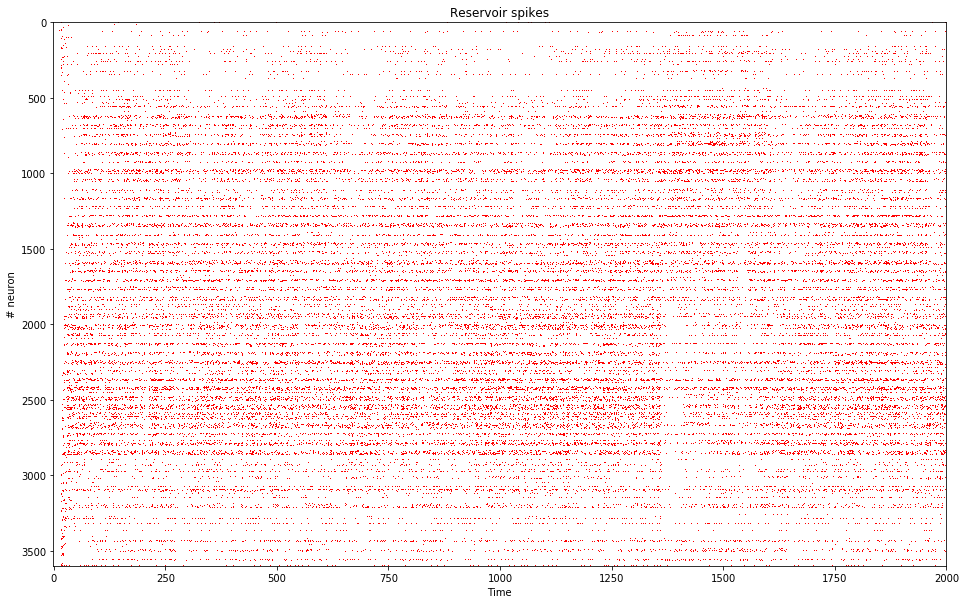

In [5]:
exp.net.plot.reservoirSpikeTrain()

In [6]:
#np.save('exSpikeTrain.npy', inExp.net.exSpikeTrains)

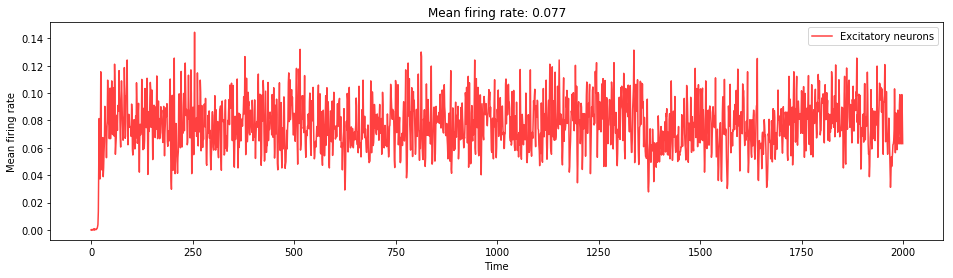

In [7]:
exp.net.plot.reservoirRates()

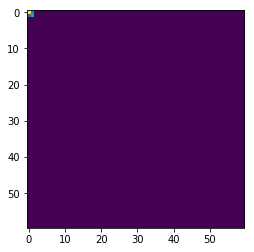

In [9]:
exp.net.plot.cueWeightMean()

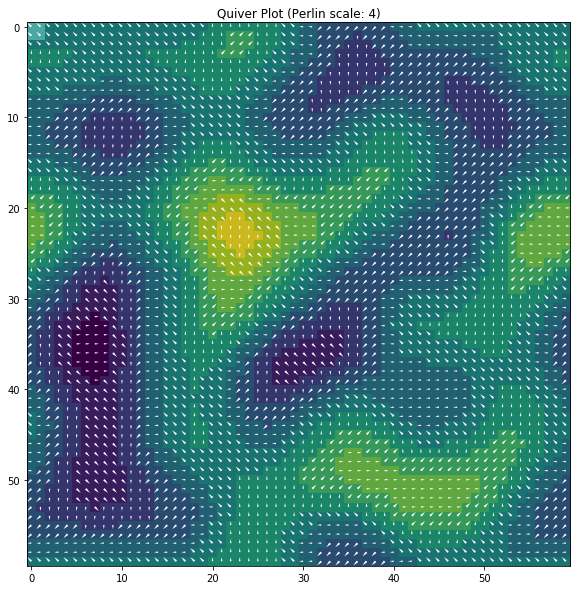

In [19]:
exp.net.plot.landscape()

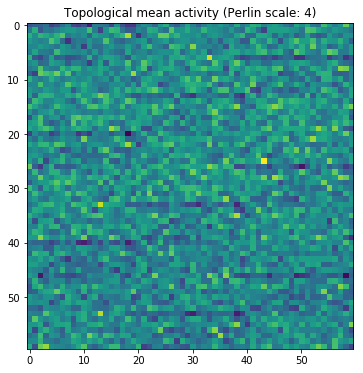

In [20]:
exp.net.plot.meanTopologyActivity()

In [ ]:
#%matplotlib inline
#inExp.net.plot.reservoirSpikeTrain(fr=2000, to=3000)

In [ ]:
# spikes of ex neurons
#sp = exp.net.exSpikeTrains

In [ ]:
# topological spikes
#st = sp.reshape(-1, 60,60)[200:,:,:]
#shp = st.shape
#shp

In [ ]:
#binSize = 10
#numBins = int(shp[0]/binSize)

#spBinned = np.array([ st[i*binSize:(i+1)*binSize,:,:] for i in range(numBins) ])
#act = np.mean(spBinned, axis=1)
#act.shape

In [ ]:
#fig = plt.figure(figsize=(4,4))
#p = plt.imshow(act[0,:,:], interpolation='none', aspect='auto', cmap='Greys', vmin=0, vmax=0.5)

In [ ]:
#%matplotlib notebook
#import matplotlib.animation as animation

#fig = plt.figure(figsize=(4,4))

#frames = []
#for i in range(act.shape[0]):
#    frames.append([plt.imshow(act[i,:,:], cmap="Greys", animated=True)])

#ani = animation.ArtistAnimation(fig, frames, interval=100, blit=True, repeat_delay=1000)
#ani.save('movie.mp4')
#plt.show()

%matplotlib notebook
import matplotlib.animation as animation

fps = 20

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(8,8) )

a = st[0,:,:]
im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_array(st[i,:,:])
    return [im]

#anim = animation.FuncAnimation(fig, animate_func, frames = shp[0], interval = 1000 / fps) # in ms)

#anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])
                               

In [ ]:
#plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'

In [ ]:
#anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

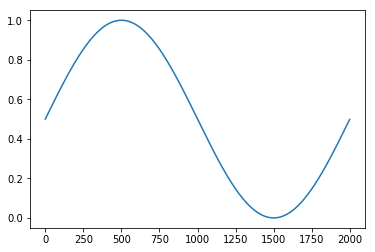

In [21]:
T = exp.p.totalSteps
target = 0.5+0.5*np.sin((np.pi/(0.5*T))*np.arange(T))
plt.plot(target)

In [27]:
params, ye, performance = utils.trainOLS(exp.net.exSpikeTrains, exp.net.exSpikeTrains, target)

In [28]:
params

array([ 3.80132834e-01,  8.49562516e-01,  9.31438496e-02, ...,
        1.58524228e-01,  2.12559089e+04, -7.28236904e+03])

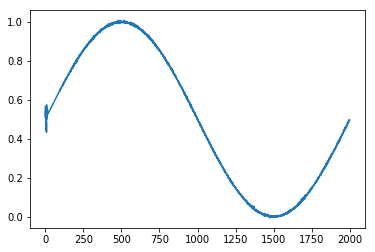

In [29]:
plt.plot(ye)

In [30]:
performance.mse

2.23547735364121e-05

In [31]:
performance.cor

0.9999105860317701